# CONVOLUTIONAL NEURAL NETWORK (CNN)

Datasetimizin üzerinden geçerksek; 28*28 pixellerden oluşan ve 0-9 arası rakamların imagelerinden meydana gelir. (8000 image)

LOADING THE DATASET

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [42]:
warnings.filterwarnings("ignore")

Datamız train ve test olmak üzere iki farklı kısımdan oluşuyor.

In [43]:
# read train 
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


784 pikselim 1 label için sütunum var, 42000 image sayısı.

In [44]:

# read test 
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Train deki labelları y_train diye ayıralım. Hedef değişkenimizi farklı bir dataframe haline getirelim.

In [45]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

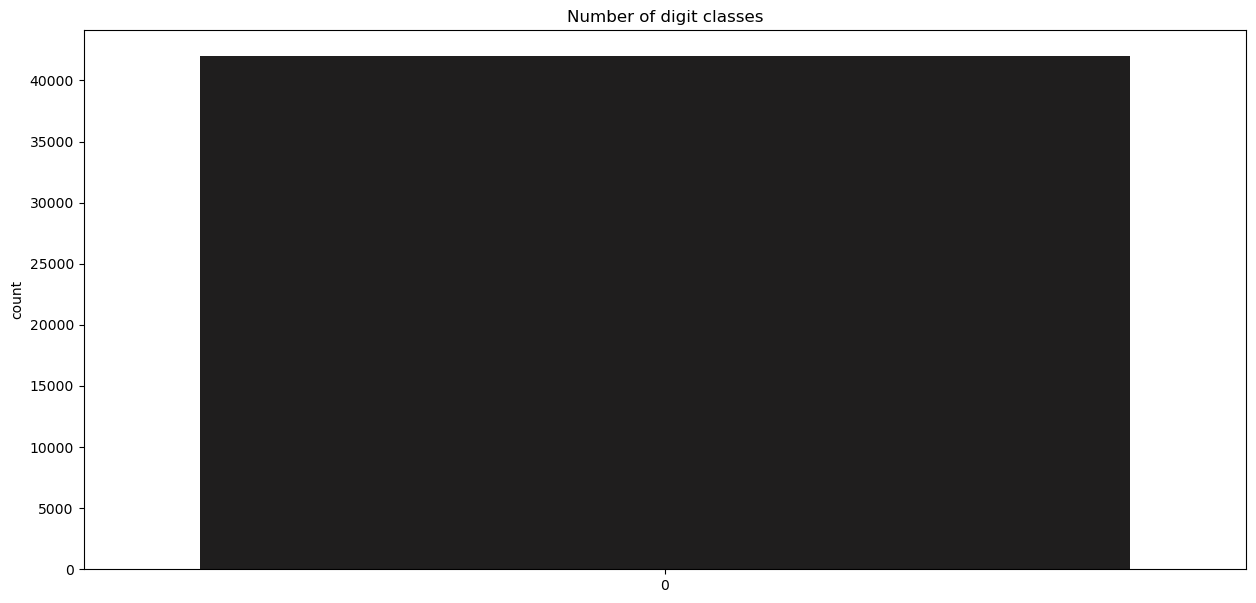

In [46]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

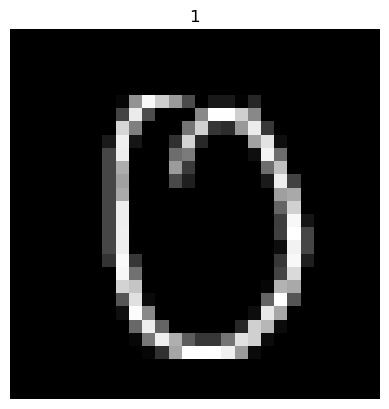

In [47]:
img = x_train.iloc[0].values
img = img.reshape((28,28))
plt.imshow(img, cmap= "gray")
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

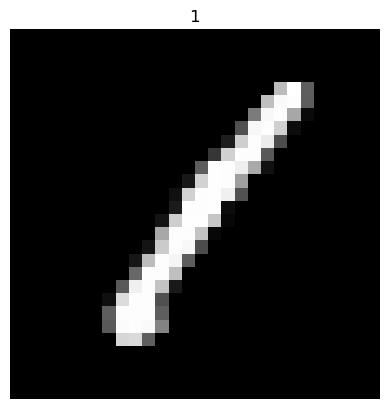

In [48]:

# plot some samples
img = [X_train.iloc[0]]
img = np.reshape(img,(28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

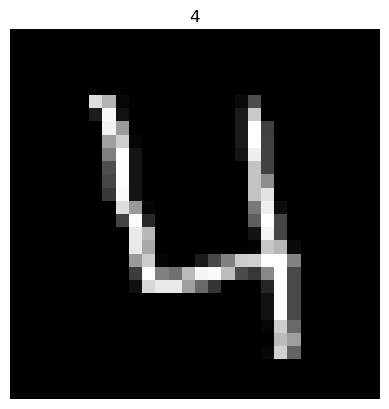

In [49]:

# plot some samples
img = [X_train.iloc[3]]
img = np.reshape(img,(28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

10 sınıflı totalde 70000 sampledan oluşan bir dataset.

# Normalizasyon -Reshape- Label Encoding

Normalizasyon: Resimleri normalize edelim. Normalizasyon nedir ve ne işe yarar bakalım. Normalizasyon kodumuzun daha hızlı çalışmasını sağlayan ve pixel değerilerimizi 0-1 arasında sıkıştıran bir işlemdir. Bilgisayar biliminde her bir rengin sayısal bir karşılığı vardır.

Reshape : train ve test verisetlerimiz 28X28. Biz bunu 28*28*1 3D bir matris elde edeceğiz. Keras 2D matrislerle işlem yapmaz. X1 burada resmin gray scale olduğunu yani siyah beyaz olduğu anlamına gelir. Eğer görsellerimiz renkli olsaydı X3 diyecektik. Yani RGB olduğunu belli edecektik. Buna renk kanalları denir.

Label Encoding: Labelların karşılığını bilgisayar bilimindeki binary sayı değerinde ifade etmektir. Şuan labellarımız 1,2,3 şeklinde olabilir fakat bilgisayar dilinde bunu kodlamamız önemlidir.

In [50]:

# Normalize the data

X_train = X_train / 255.0

test = test / 255.0

print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [51]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


Label encoding y_train'i 10 sınıflı kodladık. One-hot-encoding denir

In [52]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

# Train Test Split

Normalde test ve train olarak ayırıyoruz. Fakat veriyi train ederken modeli geliştirmek ve hyper parameterlerin ayarlanmasında validation veri setini de parçalarız. Başarıyı optimize edebilmek için train verisetimizin bir kısımını validation veriseti olarak ayırıyoruz. Yani sonuç olarak train veriseti ile modelimi oluşturcam ardından validation ile doğrulamamı yapıcam. En sonunda ise test ile modelimizi test edeceğiz.

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


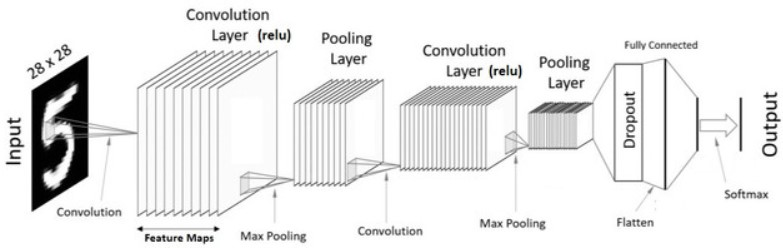

Kabaca yapmaya çalıştığımız şeyleri açıklayalım. Cnn genellikle object detective ya da image classification amcıyla kullanılır. Öncelikle sınıflandırmak istedğimiz resmi düşünleim. Mesela bir kedi resminin bir kedi mi yoksa bir köpek mi olduğunu nasıl anlarız. Bir kediyi sınıflandırabilmek için neye ihtiyacımız olur? Kediyi köpekten ayır eden özelliklerdir. Mesela kuyruğunun şekli, kulaklarının sivriliği ya da gözlerinin rengi. Yani elimde öyle bir filtre olmalı ki kediyi diğer hayvanlardan ayır etsin. Filtreyi kedi resminin üzerine uyguladığım anda kedi olduğunu anlasın. 


Convolution Layer burada benim filtre görevini görüyor.Kedimizin özelliklerini detect ettiğimzi katmandır. Bu layerin içinde Feature Detectior' lar var ve buranın totali de conovolut Feature dediğimiz alandır. 


Pooling Layer : bu adımda down sampling yapıyoruz. Convolution layerimizin size ını düşürüyor. En  belirgin özelllkiler ve bu belirgin özelliklerin de ayırt edici özelliklerini alıyor. (İşlem yükünden ve zamandan tasarruf). Görüntütnün şeklini de analiz etmekte kolaylık sağlar. Resmin yana yatık olması vs. Ve en sonunda overfitting i engelliyor. Bir datanın aşırı ezberlenmesinin önüne geçiyor. 

Ardından bir tür daha convolution layer yapıyoruz. Bu datadan dataya değişir elbette. Ardından tekrar pooling layer yapıyoruz. Ve en sonunda flatten yapıyoruz. Burada matrixleri vektör haline getirmekti. 

Peki neden çıktıları düzleştiriyoruz. bunun sebebi ise tekrar neural network e sokucaz. Resmimi sınıflandırmak için gerekli featurelarımı çıkarttım ardından artifical neural network te yaptığımız gibi bir output elde edicez.



# Convolution Operation Nedir?

Benim elimde bir resim var ve 3X3 lük bir feature detector(filtre, kernel) var. Bizim resmi analiz etmeye, classify etmeye yarayan bir filtredir. Resmin üzerindeki basit ya da komplex yapıları analiz etmeye yarar. Misal renk geçişlerindeki ani değer değişimi gibi. 

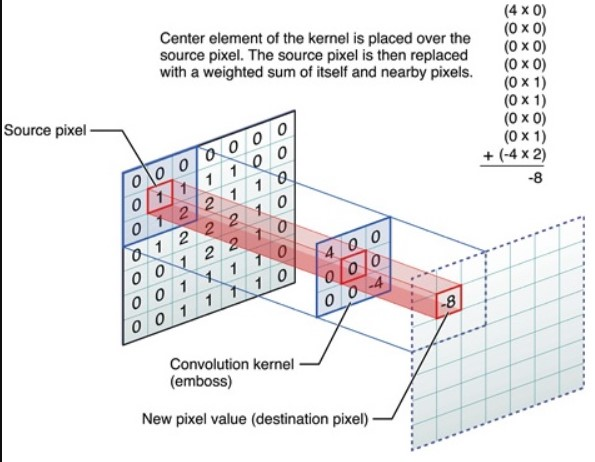

Feature map:  Feature detector ile convlution yapıyorum ve ortaya çıkan yeni convol edilmiş featurelara feature map denir. (Convolved feature) 

Stride: Rersmin her pikselin üzerinde kayma işlemidir. 

Böylelikle imagein size ni azalttık ve böylelikle kodun daha hızlı çalışmasını sağladık. Aynı zamanda bazı özelliklerin kaybolmasına da sebep oluyoruz. Tek seferde bir şeyin ayır edilmesi için yeterli özelliği toplayamacağımız için multiply feature map e sahip oluyoruz. Farklı filtreler kullanarak tabii ki. 



Convolution Layer dan sonra feature map'e relu fonksiyonunu kullanırız. Relu non linearity arttırır. Karmaşıklığı arttırır. 

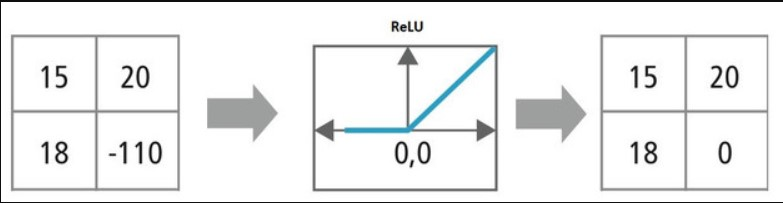

# Same Padding 

Convolution işleminde sonra elde etitğimiz resmin boyutu küçlüyor ve biz bazı özellikleri kaybetmeye başlıyoruz. Fakat bu bizim istediğimiz bir şey değil. Ayrıca conbolution işlemini adımlarını arttırdığımızda daha fazla bilgi kaybetmeye başlamış olucaz. Bunun önüne geçebilmek için resmimizin etrafına 0 lardan oluşan bir çerçeve koyup ardından filtrelerimizi öyle uyguluyoruz. Bu yola same padding denmesinin sebebi resmin filtrelenmesine rağmen girdi ve çıktı boyutunun aynı kalmasını sağlamaktır. (Aynı zamanda stride'ı 1 adımda tutyoruz.)

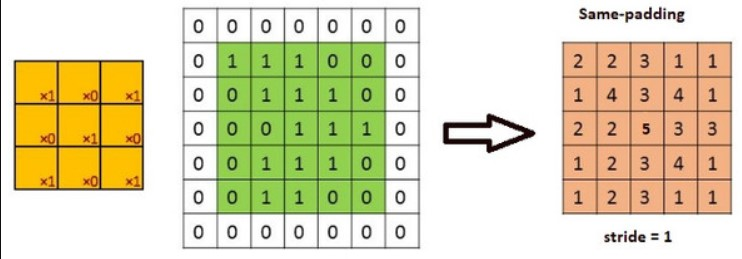

# Max Pooling

Max Pooling adımında down-sampling yapıyoruz. Yani parametrelerimizin sayısını azaltıyoruz. Max pooling 2X2 lik bir pool işlemide içinde bulunan dört değerden max olanı geçerli kılar. Bu adımı kodumuzun yavaşlamasını engellemek için yapıyoruz. 

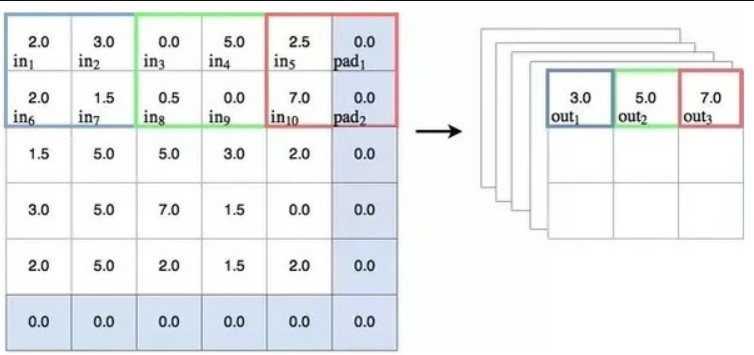

# Flattening

Matrisleri vektör haline getime işlemidir. Bunlar bizim artifical neural network yapısının inputu olacaklar.

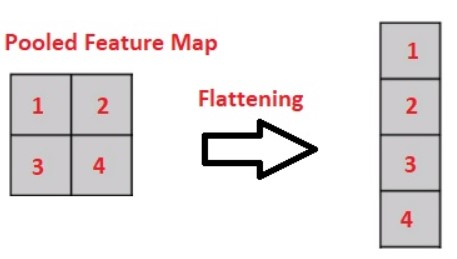

# Fully Connection

Fully Conneciton büyük resmimizde bizim son adımımız. Yani Artifical Neural Network yaptığımız adımdır. Classification yaptığım ve soft_max fonksiyonunu uyguladığım adımdır. Aslen neural network yaparken her bir node u biribieine bağlamak zorunda değiliz. Fakat full conneciton derken burada her bir node un birbiriyle ilişkisi olmak bir bağlantısı olmak zorundadır.

Bilinen Artifical Neural Network

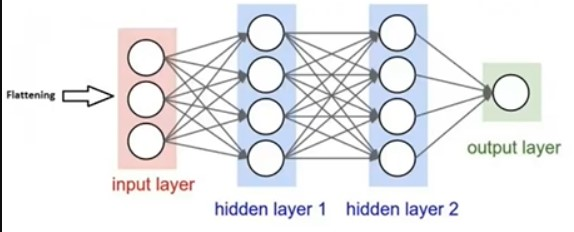

# Implementing With Keras

CREATE MODEL

Model şu şekilde olacaktır:

conv => max pool => dropout => conv => max pool => dropout => fully connected (2 hidden layers)

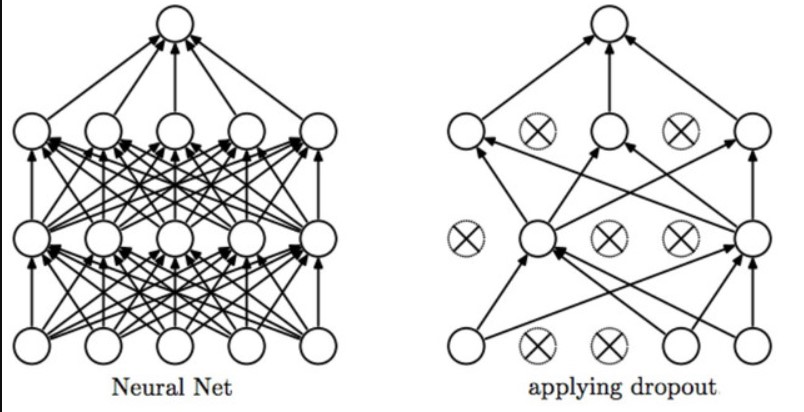

Drop Out Nedir?

Drop out, train esnasında bazı nodelerın belirli şarlar altında devre dışı bırakılması olayıdır. Elimizde bir neural ntwork var ve bir kez forward propagation yapıyorum, forward propagation yaparken burada random bir şekilde seçtiğim nöronları kapatıyorum. Devre dışı bıraktığım zaman bunlar ve diğer nöranlar arasında bir bağlantı kalmıyor. Random bir threshold belirliyoruz. Örneğin 8 sayısının altında ise bırakma fakat 8 sayısının üzerinde ise bu nöronu devre dışı bırak diyoruz. Modelimizin aşırı öğrenmesini yani modeli ezberlermesini engeleek için aldığımız önlemlerden biridir. 

# LET'S CODE!

In [55]:
#keras kütüphanesine ait kullanacağımız metodlar:

from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Sequential içinde layerları barındıran bir yapıdır.

In [56]:
model = Sequential()

Bu kodda yaptıklarımızı açıklayalım:

Bu kod, bir Convolutional Neural Network (CNN) modelindeki ilk katmanı tanımlar. Conv2D işlevi, modelin girdi verilerinin 2 boyutlu bir filtreleme işlemine sokararak özellik haritasını (Feature map), üreten öğrenilebilir filtreleri öğrenir. Filre size 5X5 ve filre sayımız 8 , padding argümanım same yani boyutlarımın aynı şekilde kalmasını sağlamak istediğim ve özellik kaybetnin önüne geçmek için uyguladığım adımdır. (Girdi boyutunu koruyoruz.)

Activation fonksiyonu için ReLu fonksiyonun kullanılması öğrenme sürecini hızlandırmak ve non-linear özelliğini özellikleri modellemek için kullandığımız bir foknisyondur.

input shape i yukarıda split ettik ve resimlerimiz 28X28 boyutununda ve 1 kanaldan oluşuyordu. Rengimiz siyah beyazdı.

MaxPool2D veri boyutunu azaltmak için maximum havuzlama işlemini gerçekleştiren fonksiyounumuz . Overfitting riskini azaltmak için kullandığımız adımıdır. 

Dropout her eğitim iterasyonunda rastgele birimlerin belirli bir yüzdesini devre dışı bırakarak, modelin farklı özellikere adapte olmasını ve daha iyi bir genelleştirme yapmasına yardımcı oluyordu. %25 ini devre dışı bıraktık.

Bu kodun ilk layeri oluşturduğunu input_shape parametresinin girili olmasından anlayabiliriz.

Çeşitlilk olması açısından farklı özelliklerle diğer layerları da ekledik. 



In [57]:
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))



İkinici adımda birinciden farklı olarak strides metgodu kullanılmıştır. Burada hedeflenen de her seferinde 2 birim kayarak filtreyi image üzerine uygulamaktır. 

Son olarak flatten işlemi gerçekleştirilmiştir.convolution dan sonuç olarak çıkan her matrisi düzleşitirp bir vektör halinr getirdiğimiz adımdır.

not: Softmax binary değil multi sınıflandırmalar için kullanılan bir fonksiyondur.

# Adam Optimizer

Elimizde bir learning rate vardı ve bu learning rate sabitti normal şartlarda ama adam optimizer kullandığımda değiştirebiliyordum. Yine değiştircez. Elimizde beta1 ve beta2 learning rate in değişimini etkileyen parametrelerdir. Learning rate i değiştirmek de daha hızlı öğrenmemizi sağlayan bir parameterdir. Eğer learning rate im küçükse ve biz minimum noktaya yani cost fonksiyonun minimum olduğu noktaya uzaksak Learning rate i arttırır. Eğer ki çok hızlı gidip minimum değeri atladıysam ve uzaklaşmaya başladıysam da Learning Rate i düşüren bir optimzasyon aracıdır.

In [60]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compıle Model

Modelimizin parçalarını birleştirmw adımına geldik. Fakat öncesinde bizim loss fonksiyonumuz vardı ve lost fonksiyonu modelimizin ne hata oranıydı. Hata çok ise weightleri update ediyorduk. Hata oranı minimuma inene kadar. 

Burada Categorical CrossEntropy i kullanacağız. Bunun Binariy CrossEntropy den farkı çoklu karşılaştırma yapabilmesidir. (Multi Class)

Compile kısımınıda neler var? 

Optimizerı belirliyorum. Loss function u belirliyorum ve metriğimi belirliyorum. Yani bu çıkan sonucu accuracy yani doğruluk oranına göre belirleyeceğimi belirtiyorum.



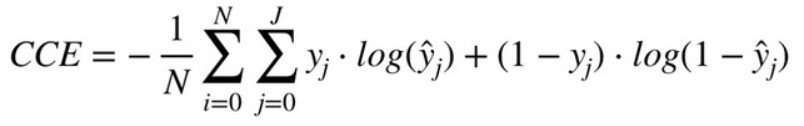

In [61]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Batch ve Epoch

Bzim bir datasetimiz var ve 10 tane sample' ımızın olduğunu varsayalım.(Elimizde 10 farklı image olduğunu varsayalım.) Biz Batch_size 2 ye sahip olduğumuzu düşünelim. Yani bu ne demek? Her forward ve backward propagation adımında 2 image kullanırız ve verisetinde her sample ın tamalanması için totalde 5 kere tekrar etmeliyiz. bu 5 tekrar da Epoch olarak adlandırılır.  

In [65]:
epochs= 10
batch_size= 250

# Data Augmentation

Overfittingi engelleyebilmek için farklı notasyonlardaki verileri verisetimize eklemmeiz lazım. Eğer bir şeye hep aynı açıdan bakarsak diğer tüm açıları kaçırırız ve görebileceğimiz şeyleri sınırlandırmış oluruz. Training datamızda küçük değişiklikler yaparak bu değişiklikler sayesinde bizim gerçek resmimize benzeyen resimleri yeniden üretiyoruz. (Zoom in, Zoom out, Odaklamak, Yana yatırmak gibi)

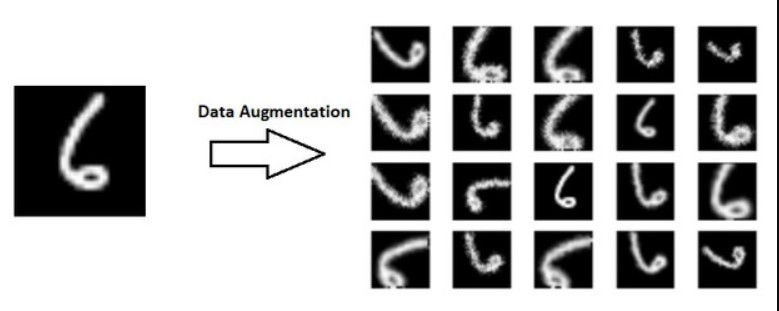

In [66]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# Fit the Model


Fit the model kısmında, her seferinde accuracy bana verecek şekilde tek seferde 250 image tarayacak ardından bunu 10 adımda gerçekleştirmesini söyledik. Epoch u arttırabiliriz, data augmentation kısımında yaptığımız değişiklikerle oynayarak özellikle yüzde değerleriyle oynayarak accuracy arttırabiliriz. Ayrıca batch_size ile oynayarak değişikliklere sebep olabilirsiniz. Ya da layer katmanında ekstra layerlar ekleyip filtre boylarını node sayılarını değiştirerek değerlerdeki değişimleri gözlemleyebilirsiniz. (Epoch u arttırmak ve layer sayısını da tabii analizin saaatler sürmesine sebep olabilir.) Çokça Hyperparametresi vardır.

In [70]:

# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 20s 134ms/step - loss: 0.1541 - accuracy: 0.9527 - val_loss: 0.0534 - val_accuracy: 0.9810
Epoch 2/10
151/151 [==============================] - 25s 167ms/step - loss: 0.1546 - accuracy: 0.9524 - val_loss: 0.0529 - val_accuracy: 0.9826
Epoch 3/10
151/151 [==============================] - 26s 173ms/step - loss: 0.1517 - accuracy: 0.9534 - val_loss: 0.0562 - val_accuracy: 0.9814
Epoch 4/10
151/151 [==============================] - 24s 158ms/step - loss: 0.1439 - accuracy: 0.9562 - val_loss: 0.0506 - val_accuracy: 0.9826
Epoch 5/10
151/151 [==============================] - 25s 168ms/step - loss: 0.1398 - accuracy: 0.9552 - val_loss: 0.0471 - val_accuracy: 0.9855
Epoch 6/10
151/151 [==============================] - 26s 174ms/step - loss: 0.1400 - accuracy: 0.9566 - val_loss: 0.0474 - val_accuracy: 0.9838
Epoch 7/10
151/151 [==============================] - 29s 191ms/step - loss: 0.1279 - accuracy: 0.9598 - val_loss: 0.0440 - val_ac

# Evaluate the Model

Loss Function ve Accurcy değişimini gözlemledik. Epoc sayısı artarsa kayıp azalır.

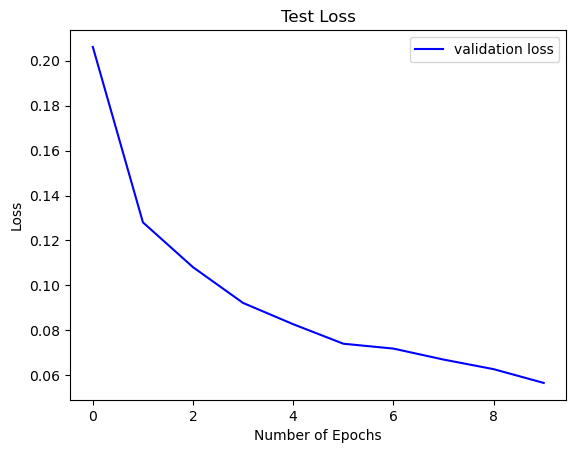

In [68]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 0s 3ms/step


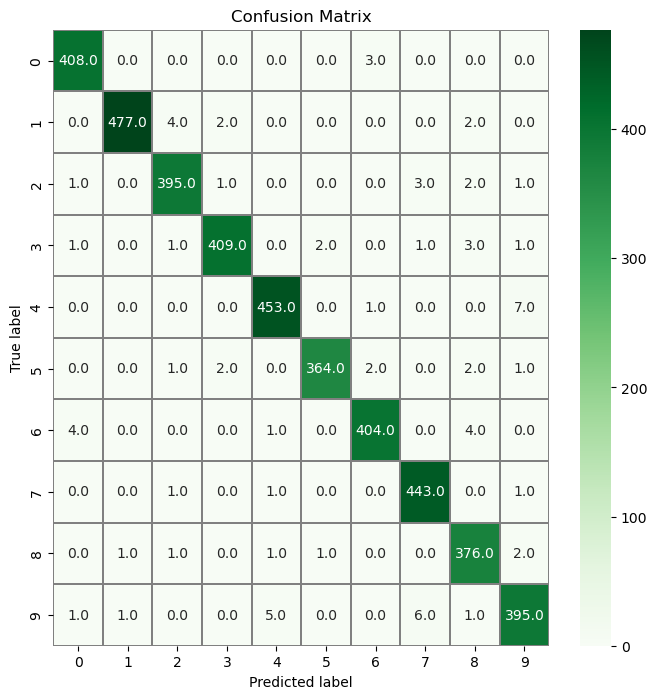

In [69]:
#confusion matrix
import seaborn as sns
#Predict the values from the validation dataset
Y_pred = model.predict(X_val)
#Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
#Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis=1)
#compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
#plot the confusion matrix
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()